In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\gupta\\Documents\\GitHub\\Project-1---Crime-Demographics-and-City-Response\\Graphs and Analysis'

In [5]:
# %run Final_Analysis.ipynb
final_df = pd.read_csv('../Final_Data.csv')

In [6]:
final_df.head()

,Unnamed: 0,Neighbourhood,Hood_ID,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Total Average Rate,...,Percentage of Dwellings Built in 1990 or Before,Percentage of Dwellings Built in 2005 or Before,Percentage of Dwellings Built in 1991 or After,Percentage of Dwellings Built in 2006 or After,Percentage of Dwellings Requiring Only Regular Maintenance or Minor Repairs,Percentage of Households with Maintainer aged 34 and under,Percentage of Households with Maintainer aged 65 and older,Percentage of Households Spending over 30% of Income on Shelter,Speeding,Income Group
0,0,South Parkdale,85,1148.8,91.5,407.3,4.6,151.0,100.7,317.32,...,81.307591,87.713910,18.648530,12.242211,89.157155,34.372256,13.871817,49.230769,26.0,25-50K
1,1,South Riverdale,70,936.3,143.5,477.1,0.0,125.6,75.3,292.97,...,75.714878,83.381683,24.036469,16.369664,92.100910,22.350993,15.687086,31.156406,20.0,75-100K
2,2,St.Andrew-Windfields,40,325.6,196.5,466.0,0.0,67.4,33.7,181.53,...,73.929961,93.073930,25.758755,6.614786,95.101089,7.226107,29.059829,33.879781,3.0,175-200K
3,3,Taylor-Massey,61,777.9,76.5,401.7,6.4,82.9,19.1,227.42,...,93.540670,99.202552,6.299841,0.637959,87.878788,20.478088,17.131474,44.143426,4.0,50-75K
4,4,Humber Summit,21,950.4,1087.3,459.1,24.2,225.5,177.2,487.28,...,90.115533,97.175866,9.884467,2.824134,93.589744,10.668380,34.575835,31.666667,23.0,50-75K


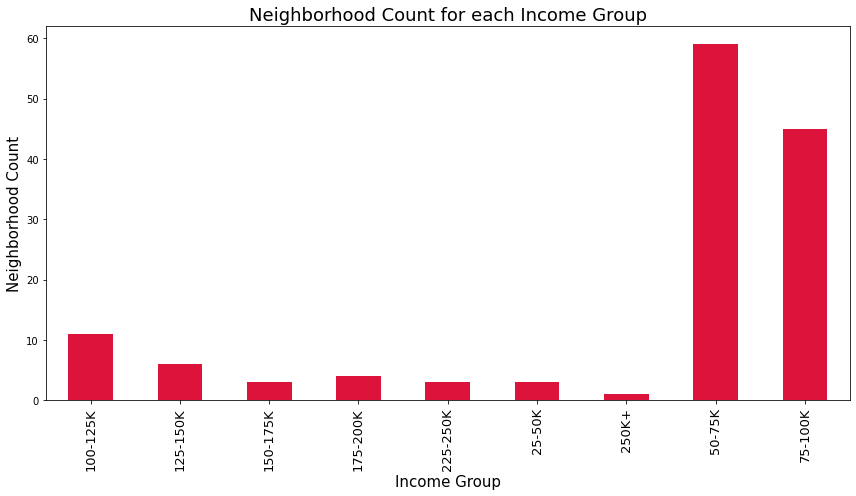

In [7]:
#Sort the data on Income
sorted_df = final_df.sort_values("Average_Income")

#Count Neighborhoods for each Income group and append it to our dataframe
count_neighborhood_df = final_df.groupby(["Income Group"]).count()["Neighbourhood"]
sorted_df["Count_Neighborhood"] = count_neighborhood_df
count_neighborhood_df

#Plot the bar graph showing count of neighborhoods for each Income Range
count_neighborhood_df.plot(kind ='bar',color = 'crimson',figsize=(12,7))

# Set labels for axes
plt.xticks(rotation=90,fontsize = 13)
plt.xlabel("Income Group",fontsize = 15)
plt.ylabel("Neighborhood Count",fontsize = 15)
plt.title("Neighborhood Count for each Income Group",fontsize = 18)

#Save the output and display resulting plot
plt.savefig("Neighborhood_Count_for_Income_Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

In [8]:
#Fetch sum of each crime type for each Income Range
grouped_df =final_df.groupby(["Income Group"]).agg(
    {
         'Assault Rate':sum,    
         'Auto Theft Rate': sum,  
         'Break&Enter Rate': sum , 
        'Homicide Rate': sum,
        'Robberey Rate': sum,
        'Theft Over Rate': sum
    }
)

grouped_df.head()

,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate
Income Group,,,,,,
100-125K,5560.8,1732.2,3507.2,15.5,1085.3,524.3
125-150K,2382.4,787.0,1739.6,8.5,576.6,206.9
150-175K,723.8,500.5,792.7,0.0,179.5,116.6
175-200K,1308.4,658.4,1309.6,0.0,239.1,156.8
225-250K,1103.5,617.4,1069.0,0.0,369.3,147.3


In [9]:
# Count Neighborhoods for each Income group and append it to our dataframe
count_neighborhood_df = final_df.groupby(["Income Group"]).count()["Neighbourhood"] 
grouped_df["Count_Neighborhood"] = count_neighborhood_df

#Drop row if it has NaN values for all columns
grouped_df=grouped_df.replace(0,np.nan).dropna(thresh=6).fillna(0)
grouped_df

,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Count_Neighborhood
Income Group,,,,,,,
100-125K,5560.8,1732.2,3507.2,15.5,1085.3,524.3,11
125-150K,2382.4,787.0,1739.6,8.5,576.6,206.9,6
150-175K,723.8,500.5,792.7,0.0,179.5,116.6,3
175-200K,1308.4,658.4,1309.6,0.0,239.1,156.8,4
225-250K,1103.5,617.4,1069.0,0.0,369.3,147.3,3
25-50K,3705.1,358.1,1370.1,13.9,511.7,190.3,3
250K+,197.6,184.5,382.1,0.0,85.6,52.7,1
50-75K,50772.2,12656.7,16909.5,255.1,8845.3,2708.5,59
75-100K,29470.3,7752.4,13399.4,113.3,4710.0,2273.2,45


In [10]:
#Divide each crime rate with Neighborhood count so as to find values per neighborhood
grouped_df["Assault Rate"] = (grouped_df["Assault Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Auto Theft Rate"] = (grouped_df["Auto Theft Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Break&Enter Rate"] = (grouped_df["Break&Enter Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Homicide Rate"] = (grouped_df["Homicide Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Robberey Rate"] = (grouped_df["Robberey Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Theft Over Rate"] = (grouped_df["Theft Over Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df

,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Count_Neighborhood
Income Group,,,,,,,
100-125K,505.527273,157.472727,318.836364,1.409091,98.663636,47.663636,11
125-150K,397.066667,131.166667,289.933333,1.416667,96.100000,34.483333,6
150-175K,241.266667,166.833333,264.233333,0.000000,59.833333,38.866667,3
175-200K,327.100000,164.600000,327.400000,0.000000,59.775000,39.200000,4
225-250K,367.833333,205.800000,356.333333,0.000000,123.100000,49.100000,3
25-50K,1235.033333,119.366667,456.700000,4.633333,170.566667,63.433333,3
250K+,197.600000,184.500000,382.100000,0.000000,85.600000,52.700000,1
50-75K,860.545763,214.520339,286.601695,4.323729,149.920339,45.906780,59
75-100K,654.895556,172.275556,297.764444,2.517778,104.666667,50.515556,45


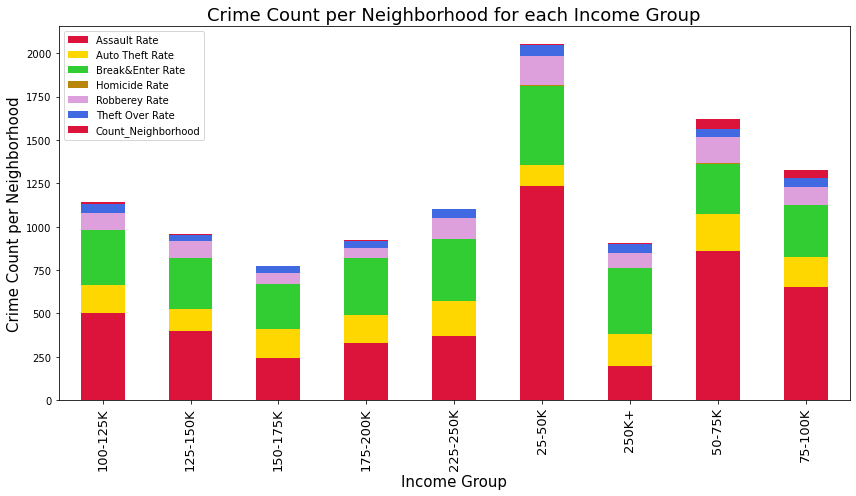

In [11]:
#Plot the bar graph showing crime count per neighborhood for each Income Range
colors = ['crimson','gold','limegreen','darkgoldenrod','plum','royalblue']
grouped_df.plot(kind ='bar', stacked = True,color = colors,figsize=(12,7))

# Set labels for axes
plt.xticks(rotation=90,fontsize = 13)
plt.xlabel("Income Group",fontsize = 15)
plt.ylabel("Crime Count per Neighborhood",fontsize = 15)
plt.title("Crime Count per Neighborhood for each Income Group",fontsize = 18)

#Save the output and display resulting plot
plt.savefig("Crime_Count_per_Neighborhood.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

#### The above graph shows Crime Count per neighborhood for each Income Group which depicts lower income regions have higher crime rate per neighborhood.